# **Importação de Bibliotecas básicas para compreensão dos dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
!pip install pmdarima

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Base de Dados total, após extração do site da Receita Federal.

*Fonte: https://www.gov.br/receitafederal/pt-br/acesso-a-informacao/dados-abertos/receitadata/arrecadacao/arrecadacao-por-estado*

In [3]:
receita_estados = pd.read_excel('Arrecadacao_Federal_2.xlsx', index_col = 'PERIODO', parse_dates=True)

In [4]:
receita_estados.head()

AC          AL  ...            SP          TO
PERIODO                            ...                          
2004-01-01  8196055.0  44664273.0  ...  4.645494e+07  13886984.0
2004-02-01  6880044.0  29343728.0  ...  9.213533e+09   9546390.0
2004-03-01  6644264.0  29646976.0  ...  1.062109e+10   8606000.0
2004-04-01  7932322.0  39141205.0  ...  1.062692e+10  13806360.0
2004-05-01  7408996.0  30907727.0  ...  9.894379e+09  10444380.0

[5 rows x 27 columns]

In [5]:
receita_estados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 2004-01-01 to 2020-11-01
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      203 non-null    float64
 1   AL      203 non-null    float64
 2   AM      203 non-null    float64
 3   AP      203 non-null    float64
 4   BA      203 non-null    float64
 5   CE      203 non-null    float64
 6   DF      203 non-null    float64
 7   ES      203 non-null    float64
 8   GO      203 non-null    float64
 9   MA      203 non-null    float64
 10  MG      203 non-null    float64
 11  MS      203 non-null    float64
 12  MT      203 non-null    float64
 13  PA      203 non-null    float64
 14  PB      203 non-null    float64
 15  PE      203 non-null    float64
 16  PI      203 non-null    float64
 17  PR      203 non-null    float64
 18  RJ      203 non-null    float64
 19  RN      203 non-null    float64
 20  RO      203 non-null    float64
 21  RR      203 non-null

In [6]:
estados = [x for x in receita_estados]

---
- Os dados acima nos mostram mês a mês a **Arrecadação das receitas federais por Unidade da Federação (preços correntes)**.
---
- Neste primeiro momento vamos plotar todos estes dados, para vizualiarmos de maneira melhor, e tirar algumas conclusões

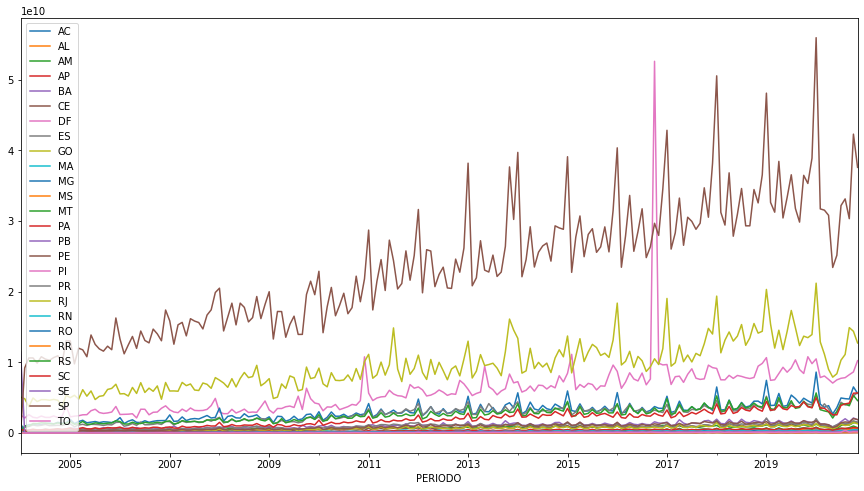

In [7]:
receita_estados.plot(figsize = (15,8));

---

1. A partir do gráfico é possível observar grande predominio na arrecadação de alguns Estados, e outros se encontram relativamente próximos.
2. Vamos identificar os 4 estados que mais arrecadam os Tributos Federais.
---

In [8]:
soma = {}

for i in receita_estados:
  soma[i] = receita_estados[i].sum()

In [9]:
soma

{'AC': 6519065904.32,
 'AL': 25611308238.13,
 'AM': 145306559353.73,
 'AP': 7401618244.169999,
 'BA': 219304153688.5,
 'CE': 134385650102.81999,
 'DF': 1204153278917.6802,
 'ES': 192186362317.03998,
 'GO': 128178722948.55,
 'MA': 60617362394.909996,
 'MG': 611877972452.15,
 'MS': 46190336276.97,
 'MT': 63371127150.9,
 'PA': 69359484437.2,
 'PB': 39654825599.95,
 'PE': 185747460766.2,
 'PI': 23987445306.6,
 'PR': 539914727132.63,
 'RJ': 1913446053560.31,
 'RN': 38185236177.14,
 'RO': 21583875066.1,
 'RR': 6601220766.21,
 'RS': 526350866268.24,
 'SC': 403134502629.94,
 'SE': 37744261828.46,
 'SP': 4736256195034.48,
 'TO': 13507203821.48}

In [10]:
soma_pd = pd.DataFrame.from_dict(soma, orient='index', columns=['Soma'])

In [11]:
soma_pd.sort_values(by='Soma', ascending=False).head(5)

Soma
SP  4.736256e+12
RJ  1.913446e+12
DF  1.204153e+12
MG  6.118780e+11
PR  5.399147e+11

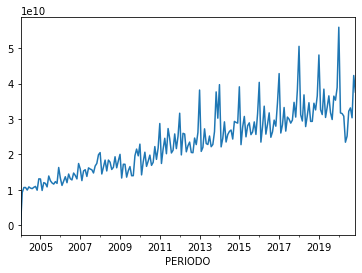

In [12]:
receita_estados['SP'].plot();

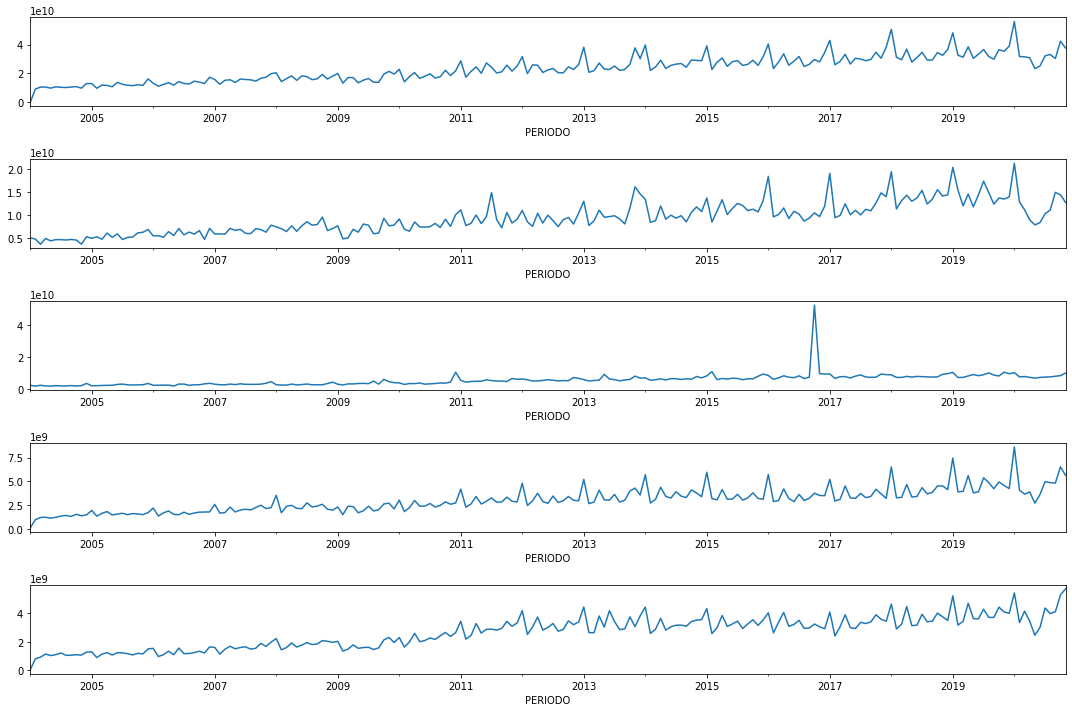

In [13]:
fig, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(5,1, figsize=(15,10))
receita_estados['SP'].plot(ax=ax1)
receita_estados['RJ'].plot(ax=ax2)
receita_estados['DF'].plot(ax=ax3)
receita_estados['MG'].plot(ax=ax4)
receita_estados['PR'].plot(ax=ax5)
plt.tight_layout()

---
- É possível observar uma tendência de aumento da receita tributária federal em praticamente todos estados observados.
- Como forma de simplificar os estudos, analisaremos a tendência Geral (soma da receita de todos os estados), para isso criaremos uma coluna com a soma de todos os Estados
- Analisaremos também o Estado de São Paulo, para conferir se a tendência geral se repete para um estado específico
---

In [14]:
receita_estados['total'] = receita_estados[estados].sum(axis=1)

In [15]:
receita_estados.head()

AC          AL  ...          TO         total
PERIODO                            ...                          
2004-01-01  8196055.0  44664273.0  ...  13886984.0  2.563036e+10
2004-02-01  6880044.0  29343728.0  ...   9546390.0  2.125227e+10
2004-03-01  6644264.0  29646976.0  ...   8606000.0  2.274929e+10
2004-04-01  7932322.0  39141205.0  ...  13806360.0  2.443728e+10
2004-05-01  7408996.0  30907727.0  ...  10444380.0  2.282434e+10

[5 rows x 28 columns]

In [16]:
# Fazer uma cópia do dataframe para trabalhar

df = receita_estados.copy()


In [17]:
df = df/1000000                       # representar os valores em milhões de R$
df.index.freq = 'MS'                  # month start frequency - frequência mensal

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [18]:
df.head()

AC         AL  ...         TO         total
PERIODO                          ...                         
2004-01-01  8.196055  44.664273  ...  13.886984  25630.363466
2004-02-01  6.880044  29.343728  ...   9.546390  21252.274033
2004-03-01  6.644264  29.646976  ...   8.606000  22749.293420
2004-04-01  7.932322  39.141205  ...  13.806360  24437.282218
2004-05-01  7.408996  30.907727  ...  10.444380  22824.343827

[5 rows x 28 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 2004-01-01 to 2020-11-01
Freq: MS
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      203 non-null    float64
 1   AL      203 non-null    float64
 2   AM      203 non-null    float64
 3   AP      203 non-null    float64
 4   BA      203 non-null    float64
 5   CE      203 non-null    float64
 6   DF      203 non-null    float64
 7   ES      203 non-null    float64
 8   GO      203 non-null    float64
 9   MA      203 non-null    float64
 10  MG      203 non-null    float64
 11  MS      203 non-null    float64
 12  MT      203 non-null    float64
 13  PA      203 non-null    float64
 14  PB      203 non-null    float64
 15  PE      203 non-null    float64
 16  PI      203 non-null    float64
 17  PR      203 non-null    float64
 18  RJ      203 non-null    float64
 19  RN      203 non-null    float64
 20  RO      203 non-null    float64
 21  RR      203

In [20]:
df.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', name='PERIODO', length=203, freq='MS')

In [21]:
df.tail()

AC          AL  ...          TO          total
PERIODO                            ...                           
2020-07-01  61.076365  242.598772  ...  124.255845   79896.147798
2020-08-01  67.174636  240.360865  ...  385.431144   81982.637685
2020-09-01  62.600098  233.863879  ...  132.262850   82771.660247
2020-10-01  76.414279  303.041327  ...  181.514877  104062.371336
2020-11-01  80.344635  279.494217  ...  167.937323   96987.197434

[5 rows x 28 columns]

In [22]:
df.describe()

AC          AL  ...          TO          total
count  203.000000  203.000000  ...  203.000000     203.000000
mean    32.113625  126.164080  ...   66.537950   56160.477224
std     17.798326   66.653824  ...   43.637569   21959.745628
min      6.644264   26.471482  ...    8.606000   21252.274033
25%     16.760748   66.404321  ...   34.694375   36742.427076
50%     31.939407  124.893794  ...   58.627330   57072.610995
75%     45.515044  176.291153  ...   92.142747   71691.142642
max    100.073573  303.041327  ...  385.431144  127098.927142

[8 rows x 28 columns]

# Plotar os Dados

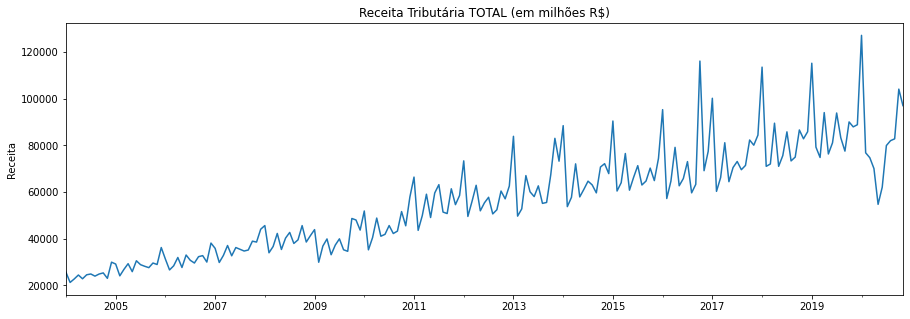

In [23]:
title='Receita Tributária TOTAL (em milhões R$)'
ylabel='Receita'
xlabel='' 

ax = df['total'].plot(figsize=(15,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


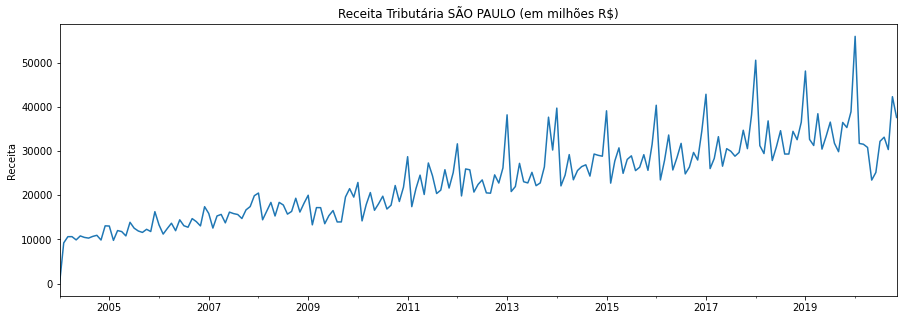

In [24]:
title='Receita Tributária SÃO PAULO (em milhões R$)'
ylabel='Receita'
xlabel='' 

ax = df['SP'].plot(figsize=(15,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

---
- É possível observar grande semelhança nos gráficos de São Paulo e no gráfico Geral.
- Possívelmente, pelo fato de que a Arrecadação de São Paulo representa grande parcela da Arrecadação Total do País.
---

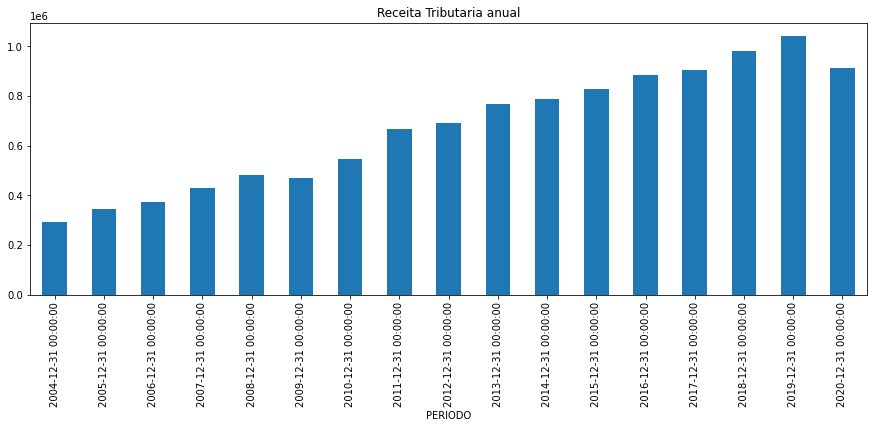

In [25]:
# Variação por ano
df['total'].resample('A').sum().plot.bar(figsize = (15,5),x = df.index, title='Receita Tributaria anual');

---
- **Será inserida uma média de 12 meses, para observar tendência**
---

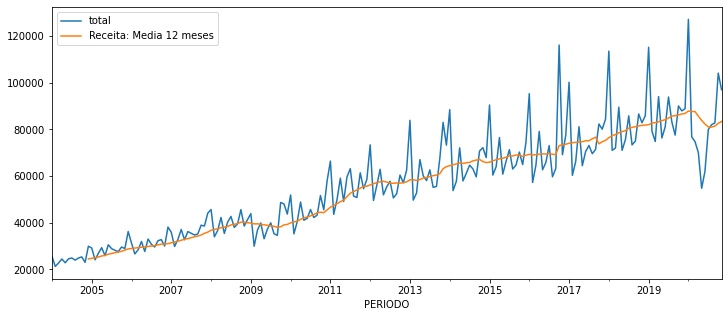

In [26]:
df['Receita: Media 12 meses'] = df['total'].rolling(window=12).mean()
df[['total','Receita: Media 12 meses']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

# Utilizando Statsmodels para obter tendência

O <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'> filtro Hodrick-Prescott </a> separa uma série temporal  $y_t$ em uma componente de tendência $\tau_t$ e uma componente cíclica $c_t$

$y_t = \tau_t + c_t$

Conforme a fonte: https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html

O valor **lamb** a ser utilizado deve ser **129600** para dados mensais.

In [27]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Separando as variáveis
rec_cycle, rec_trend = hpfilter(df['total'], lamb=129600)

In [28]:
df['trend'] = rec_trend

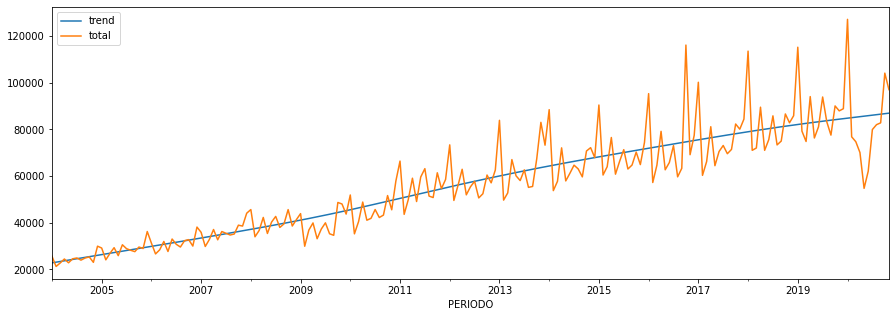

In [29]:
df[['trend','total']].plot(figsize = (15,5)).autoscale(axis='x',tight=True);

## ETS

## Error / Trend / Seasonality Models

A <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposição</a> de uma série temporal tenta isolar componentes insividuais como <em>erro</em>, <em>tendência</em>, and <em>sazonalidade</em> (ETS).



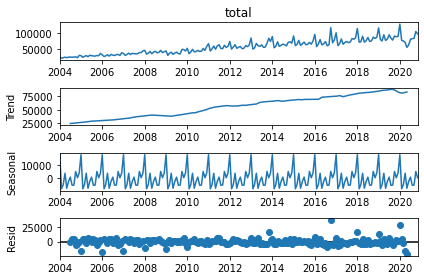

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df['total'], model='add')
resultado.plot();

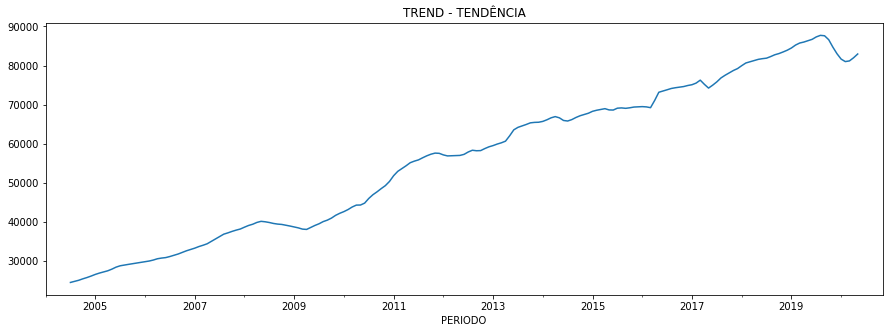

In [31]:
resultado.trend.plot(title='TREND - TENDÊNCIA', figsize=(15,5));

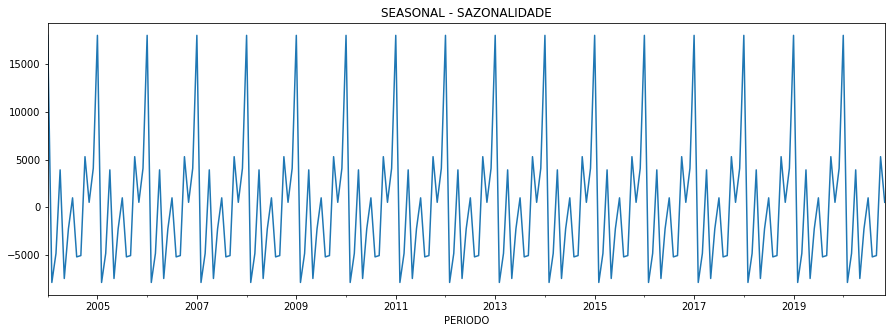

In [32]:
resultado.seasonal.plot(title='SEASONAL - SAZONALIDADE', figsize=(15,5));

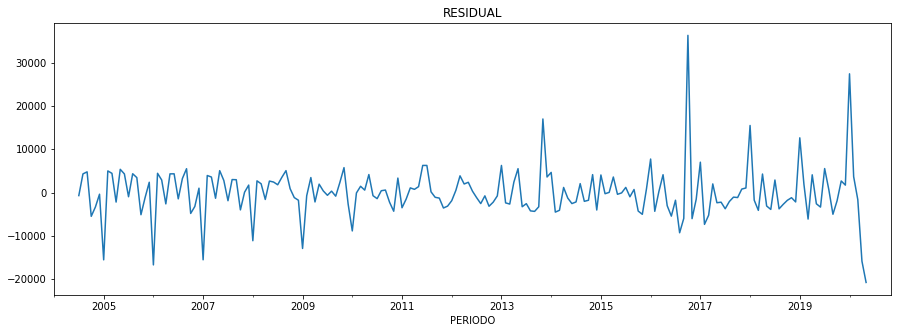

In [33]:
resultado.resid.plot(title='RESIDUAL', figsize=(15,5));

# Holt-Winters Methods

- *Fonte: https://otexts.com/fpp2/holt-winters.html*
- Método Holt-Winters lida com casos de sazonalidade.
- Possui três equações:
  - uma para ajuste de nível
  - outra para ajuste do crescimento
  - outra para sazonalidade

---
Divisão dos dados
---


In [34]:
train = df.loc[:'2016-12-01']
test = df.loc['2017-01-01':]

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train['total'],trend='add',seasonal='add',seasonal_periods=12).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [36]:
test_predictions = fitted_model.forecast(47).rename('Previsão - Holt-Winters')

In [37]:
test_predictions

2017-01-01     99766.540530
2017-02-01     65490.184742
2017-03-01     71294.847855
2017-04-01     84712.339580
2017-05-01     69873.433739
2017-06-01     73623.741157
2017-07-01     79454.973457
2017-08-01     69862.045782
2017-09-01     72015.517091
2017-10-01    100983.455183
2017-11-01     76932.560039
2017-12-01     84384.348746
2018-01-01    104076.494057
2018-02-01     69800.138269
2018-03-01     75604.801381
2018-04-01     89022.293107
2018-05-01     74183.387266
2018-06-01     77933.694684
2018-07-01     83764.926984
2018-08-01     74171.999309
2018-09-01     76325.470618
2018-10-01    105293.408710
2018-11-01     81242.513566
2018-12-01     88694.302272
2019-01-01    108386.447584
2019-02-01     74110.091796
2019-03-01     79914.754908
2019-04-01     93332.246634
2019-05-01     78493.340793
2019-06-01     82243.648210
2019-07-01     88074.880511
2019-08-01     78481.952836
2019-09-01     80635.424145
2019-10-01    109603.362237
2019-11-01     85552.467093
2019-12-01     93004

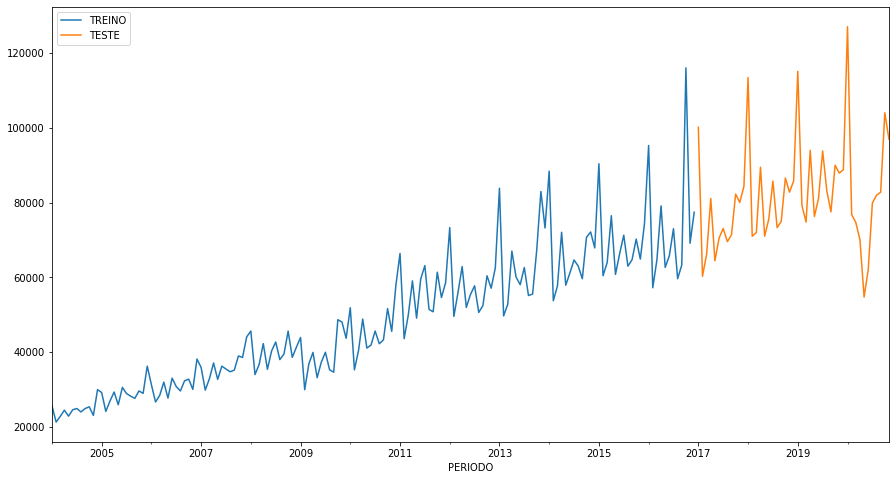

In [38]:
train['total'].plot(legend=True,label='TREINO')
test['total'].plot(legend=True,label='TESTE',figsize=(15,8));

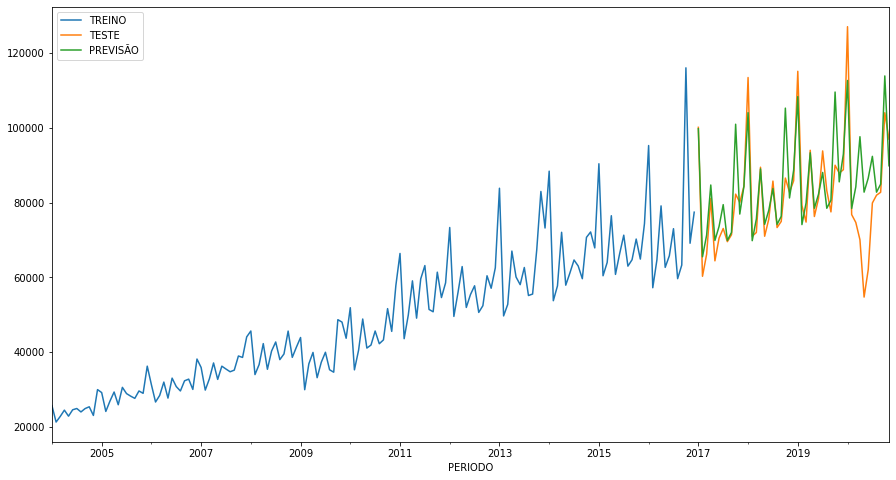

In [39]:
train['total'].plot(legend=True,label='TREINO')
test['total'].plot(legend=True,label='TESTE',figsize=(15,8))
test_predictions.plot(legend=True,label='PREVISÃO');

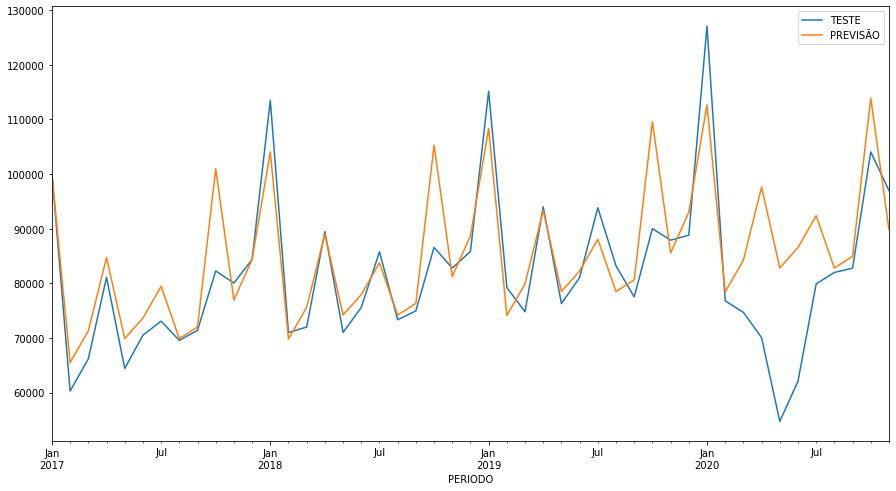

In [40]:
test['total'].plot(legend=True,label='TESTE',figsize=(15,8))
test_predictions.plot(legend=True,label='PREVISÃO',xlim=['2017-01-01','2020-11-01']);

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [42]:
mean_absolute_error(test['total'],test_predictions)

6354.68830118632

In [43]:
mean_squared_error(test['total'],test_predictions)

92167824.49046035

In [44]:
np.sqrt(mean_squared_error(test['total'],test_predictions))

9600.40751689533

In [45]:
import warnings
warnings.filterwarnings("ignore")

## Comparando Dados: **SÃO PAULO**

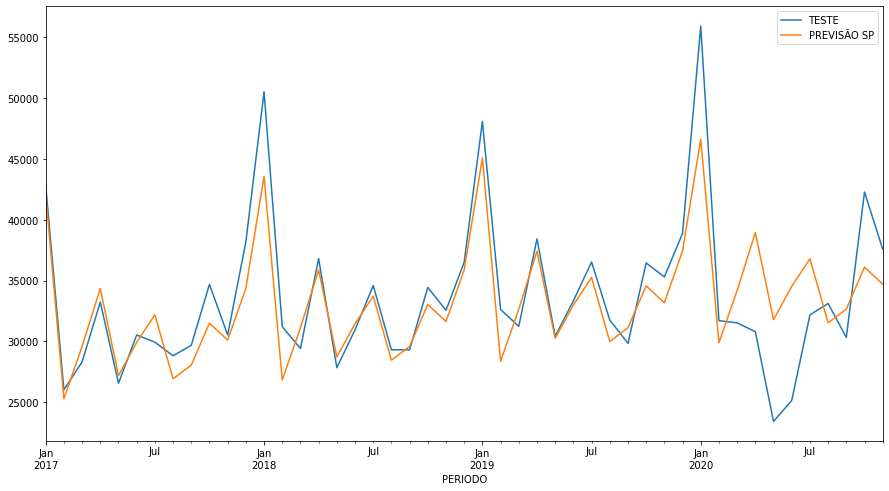

In [46]:
fitted_model_SP = ExponentialSmoothing(train['SP'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_SP = fitted_model_SP.forecast(47).rename('Previsão - Holt-Winters - SP')
test['SP'].plot(legend=True,label='TESTE',figsize=(15,8))
test_predictions_SP.plot(legend=True,label='PREVISÃO SP',xlim=['2017-01-01','2020-11-01']);

## Comparando Dados: **RIO DE JANEIRO**

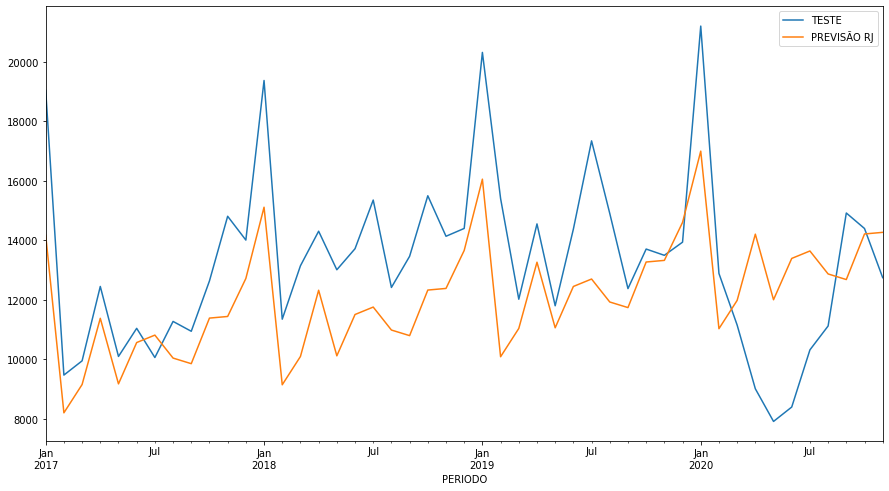

In [47]:
fitted_model_RJ = ExponentialSmoothing(train['RJ'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_RJ = fitted_model_RJ.forecast(47).rename('Previsão - Holt-Winters - RJ')
test['RJ'].plot(legend=True,label='TESTE',figsize=(15,8))
test_predictions_RJ.plot(legend=True,label='PREVISÃO RJ',xlim=['2017-01-01','2020-11-01']);

## Comparando Dados: **DISTRITO FEDERAL**

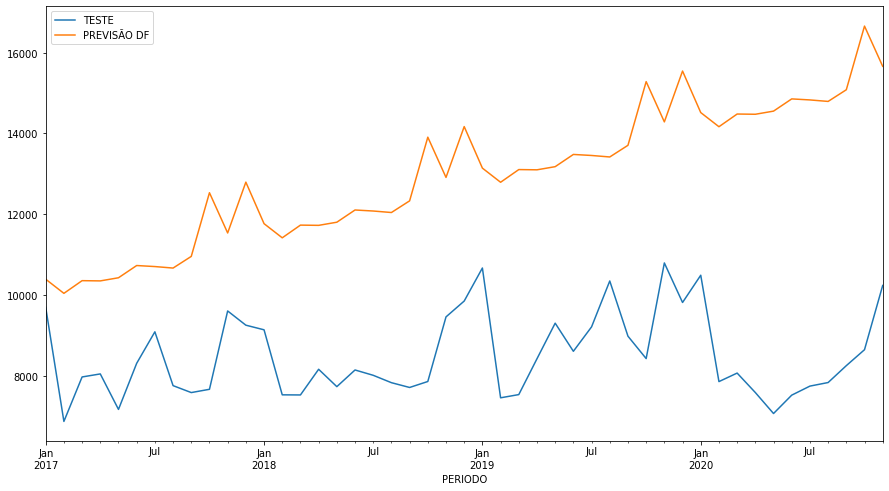

In [48]:
fitted_model_DF = ExponentialSmoothing(train['DF'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_DF = fitted_model_DF.forecast(47).rename('Previsão - Holt-Winters - DF')
test['DF'].plot(legend=True,label='TESTE',figsize=(15,8))
test_predictions_DF.plot(legend=True,label='PREVISÃO DF',xlim=['2017-01-01','2020-11-01']);

## Comparando Dados: **MINAS GERAIS**

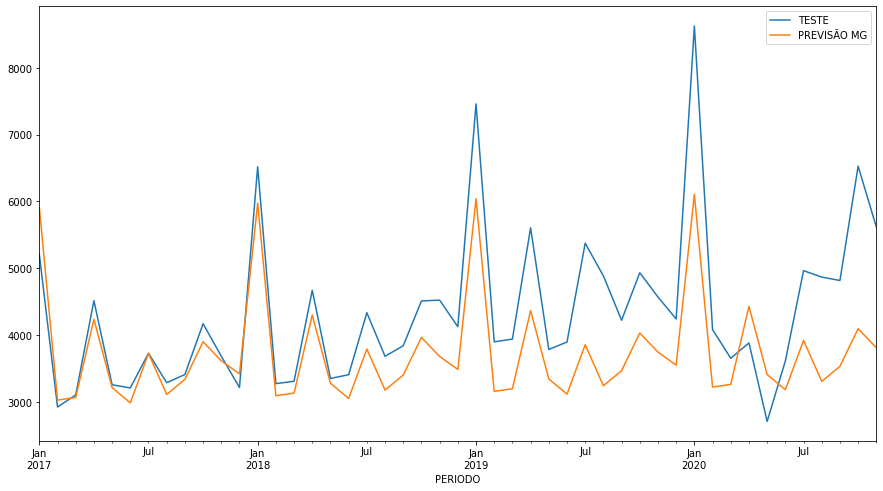

In [49]:
fitted_model_MG = ExponentialSmoothing(train['MG'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_MG = fitted_model_MG.forecast(47).rename('Previsão - Holt-Winters - MG')
test['MG'].plot(legend=True,label='TESTE',figsize=(15,8))
test_predictions_MG.plot(legend=True,label='PREVISÃO MG',xlim=['2017-01-01','2020-11-01']);

# Prevendo Futuro - "Holt-Winters"

In [50]:
modelo_HW_final = ExponentialSmoothing(df['total'],trend='add',seasonal='add',seasonal_periods=24).fit()

In [51]:
predição_HW = modelo_HW_final.forecast(36)

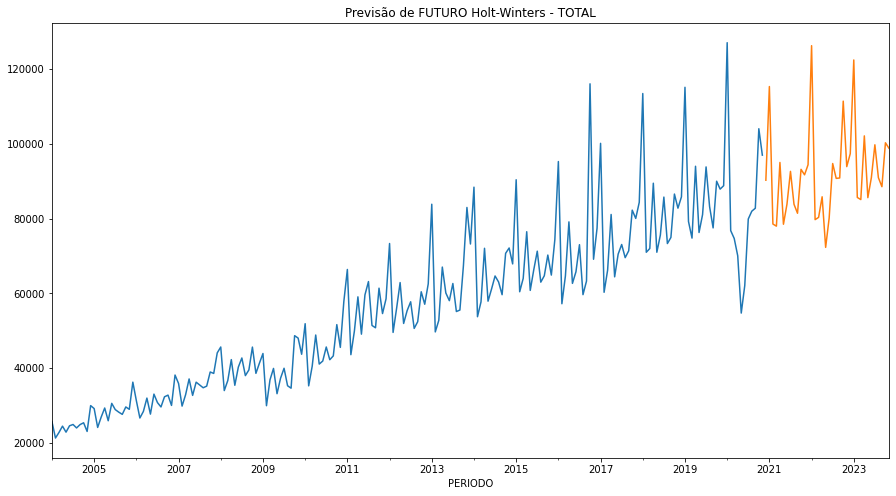

In [52]:
df['total'].plot(figsize=(15,8), title = 'Previsão de FUTURO Holt-Winters - TOTAL')
predição_HW.plot();

## Previsão HOLT-WINTERS: **SÃO PAULO**

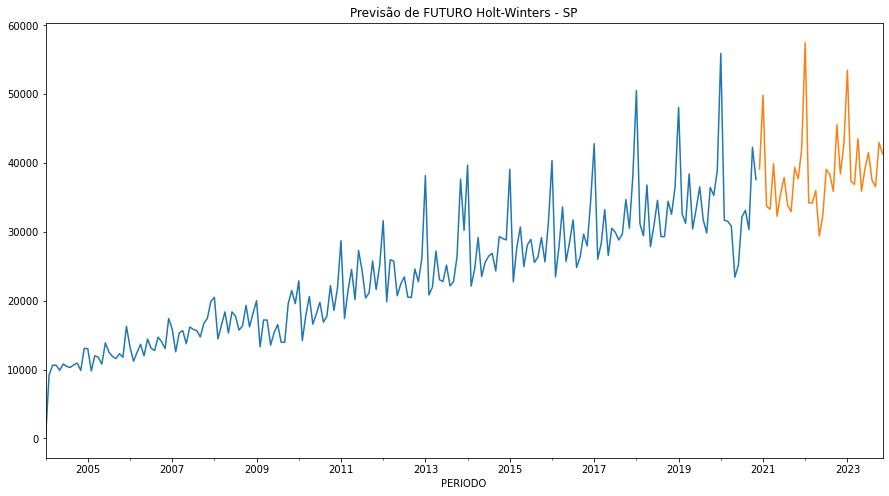

In [53]:
modelo_HW_final_SP = ExponentialSmoothing(df['SP'],trend='add',seasonal='add',seasonal_periods=24).fit()
predição_HW_SP = modelo_HW_final_SP.forecast(36)
df['SP'].plot(figsize=(15,8), title = 'Previsão de FUTURO Holt-Winters - SP')
predição_HW_SP.plot();

## Previsão HOLT-WINTERS: **RIO DE JANEIRO**

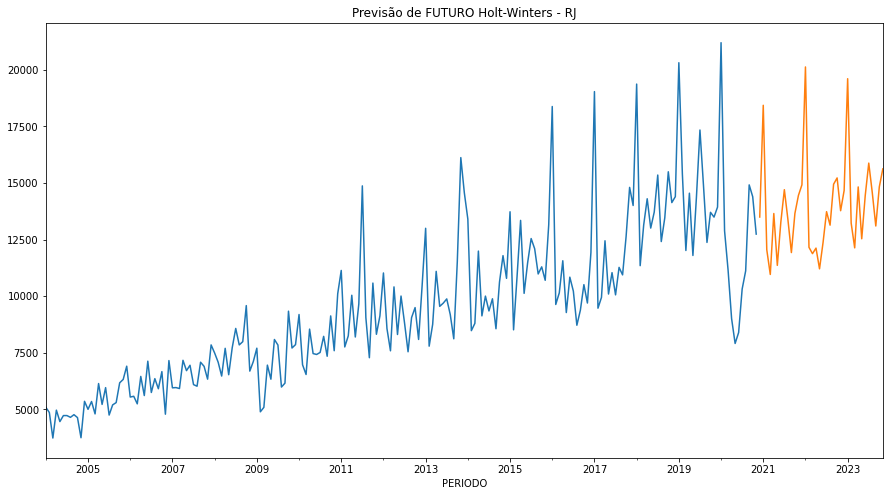

In [54]:
modelo_HW_final_RJ = ExponentialSmoothing(df['RJ'],trend='add',seasonal='add',seasonal_periods=24).fit()
predição_HW_RJ = modelo_HW_final_RJ.forecast(36)
df['RJ'].plot(figsize=(15,8), title = 'Previsão de FUTURO Holt-Winters - RJ')
predição_HW_RJ.plot();

## Previsão HOLT-WINTERS: **DISTRITO FEDERAL**

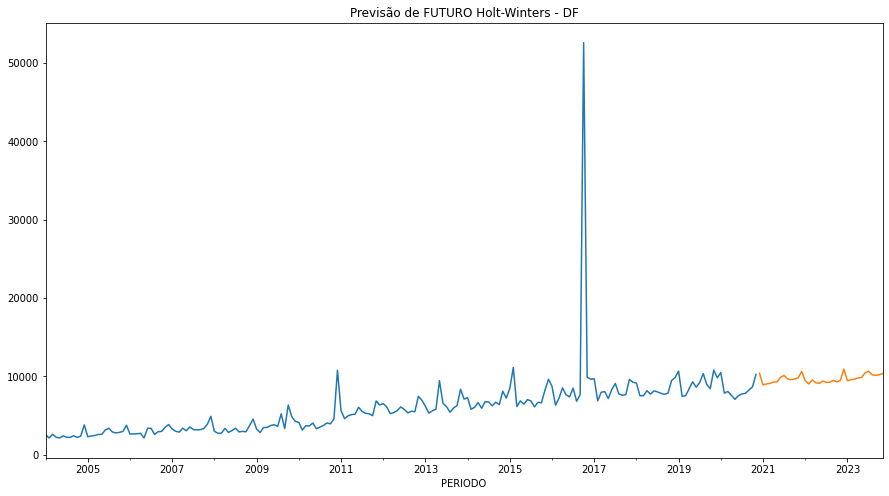

In [55]:
modelo_HW_final_DF = ExponentialSmoothing(df['DF'],trend='add',seasonal='add',seasonal_periods=24).fit()
predição_HW_DF = modelo_HW_final_DF.forecast(36)
df['DF'].plot(figsize=(15,8), title = 'Previsão de FUTURO Holt-Winters - DF')
predição_HW_DF.plot();

---
- É possível observar um Outlier no DF, mas, não influenciou na previsão;
- Como objetivo do trabalho é prever da melhor maneira as datas futuras próximas, optou-se por manter os dados intactos, sem exclusão de outliers
---

## Previsão HOLT-WINTERS: **MINAS GERAIS**

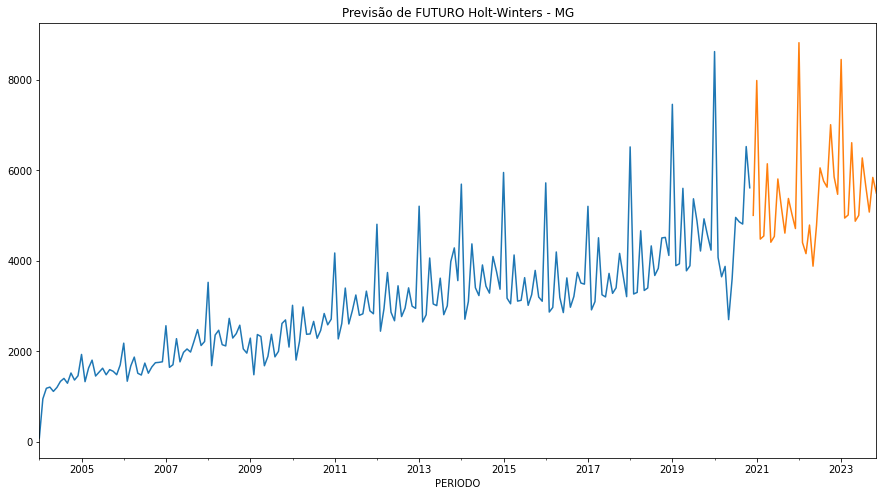

In [56]:
modelo_HW_final_MG = ExponentialSmoothing(df['MG'],trend='add',seasonal='add',seasonal_periods=24).fit()
predição_HW_MG = modelo_HW_final_MG.forecast(36)
df['MG'].plot(figsize=(15,8), title = 'Previsão de FUTURO Holt-Winters - MG')
predição_HW_MG.plot();

# **SARIMA**

## Automatizar o teste de  Dickey-Fuller Test Aumentado

- Código extraído do curso "Python for Time Series Data Analysis" - Jose Portilla

In [57]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Passar uma série temporal e um titulo opcional, retorna um relatório ADF
    """
    print(f'Teste de Dickey-Fuller Aumentado: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() para lidar com diferentes dados
    
    labels = ['ADF teste estatístico','p-value','# lags used','# observações']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'valor crítico ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Fortes evidências contra a hipótese nula")
        print("Rejeita a hipótese nula")
        print("É estacionário")
    else:
        print("Fracas evidências contra a hipótese nula")
        print("Falha ao rejeitar a hipótese nula")
        print("É não-estacionária")

In [58]:
adf_test(df['total'])

Teste de Dickey-Fuller Aumentado: 
ADF teste estatístico     -0.928537
p-value                    0.778429
# lags used               12.000000
# observações            190.000000
valor crítico (1%)        -3.465244
valor crítico (5%)        -2.876875
valor crítico (10%)       -2.574945
Fracas evidências contra a hipótese nula
Falha ao rejeitar a hipótese nula
É não-estacionária


In [59]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

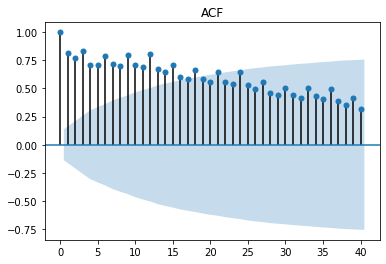

In [60]:
plot_acf(df['total'],title='ACF',lags=40);

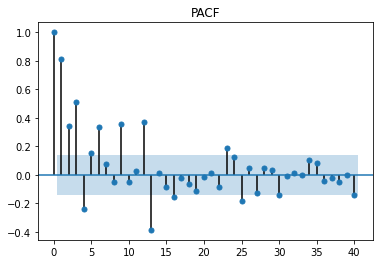

In [61]:
plot_pacf(df['total'],title='PACF',lags=40);

---
- Neste projeto vamos optar por utilizar o Auto-Arima para partir de um modelo e melhorar se houver necessidade a partir do sugerido automaticamente.
---

### ***AUTO-ARIMA***

### Rodar <tt>pmdarima.auto_arima</tt> para obter as ordens recomendadas

In [62]:
!pip install pmdarima

In [63]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

In [64]:
auto_arima(df['total'],seasonal=True,m=12).summary()         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  203
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -2056.439
Date:                            Wed, 27 Jan 2021   AIC                           4122.878
Time:                                    00:47:41   BIC                           4139.419
Sample:                                         0   HQIC                          4129.570
                                            - 203                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3053      0.045      6.856      0.000       0.218       0.393
ma.L1         -0.9388      0.025    -37.376      0.000      -0.988      -0.890
ar.S.L12       0.9599      0.021     45.797      0.000       0.919       1.001
ma.S.L12      -0.5574      0.065     -8.641      0.000      -0.684      -0.431
sigma2      3.754e+07   1.48e-09   2.54e+16      0.000    3.75e+07    3.75e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):              1475.99
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               5.18   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+31. Standard errors may be unstable.
"""

### Ajustar modelo SARIMA(1,1,1)(1,0,1,12)

In [65]:
model_sarima = SARIMAX(train['total'],order=(1,1,1),seasonal_order=(1,0,1,12))
results_sarima = model_sarima.fit()
results_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              total   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1567.706
Date:                            Wed, 27 Jan 2021   AIC                           3145.412
Time:                                    00:47:42   BIC                           3160.629
Sample:                                01-01-2004   HQIC                          3151.593
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0344      0.084      0.409      0.682      -0.130       0.199
ma.L1         -0.8434      0.043    -19.607      0.000      -0.928      -0.759
ar.S.L12       0.9161      0.044     20.799      0.000       0.830       1.002
ma.S.L12      -0.4487      0.110     -4.094      0.000      -0.663      -0.234
sigma2      3.299e+07   8.91e-09    3.7e+15      0.000     3.3e+07     3.3e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3440.35
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                             3.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.61e+30. Standard errors may be unstable.
"""

In [66]:
# Obtendo a previsão
inicio = len(train)
fim = len(train)+len(test)-1
predictions_sarima = results_sarima.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('SARIMA(1,1,1)(1,0,1,12) Previsões - Total')

In [67]:
# Comparando a previsão com os valores esperados
for i in range(len(predictions_sarima)):
    print(f"predicted={predictions_sarima[i]:<11.10}, expected={test['total'][i]}")

predicted=96132.29197, expected=100148.014887
predicted=66647.0279 , expected=60271.210211
predicted=71591.87634, expected=66180.971782
predicted=83183.67703, expected=81104.88495
predicted=70226.73635, expected=64408.962779
predicted=73224.8447 , expected=70492.986619
predicted=78279.46844, expected=73068.612012
predicted=69558.88379, expected=69546.521454
predicted=71349.71285, expected=71386.20537
predicted=99041.13095, expected=82264.797024
predicted=76605.22694, expected=80051.392213
predicted=81859.1369 , expected=84362.419145
predicted=98317.56027, expected=113487.900056
predicted=71282.30501, expected=70991.134079
predicted=75811.61562, expected=71996.079915
predicted=86431.13813, expected=89475.144442
predicted=74560.94712, expected=70993.247359
predicted=77307.59206, expected=75584.604725
predicted=81938.26422, expected=85761.283777
predicted=73949.11   , expected=73320.790611
predicted=75589.73505, expected=74954.670554
predicted=100958.5628, expected=86573.445882
predicted=

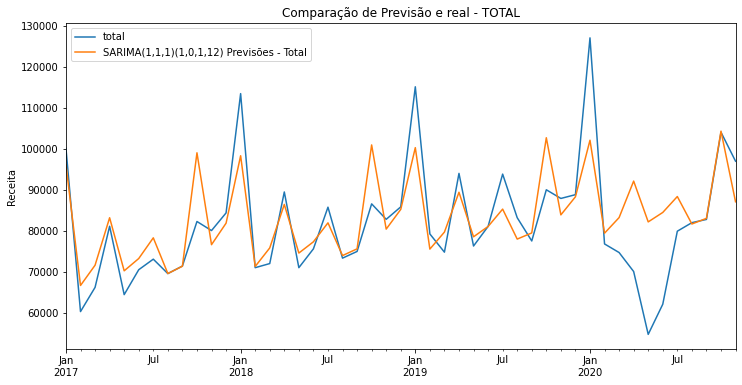

In [68]:
# Plotar previsões em relação aos valores conhecidos
title = 'Comparação de Previsão e real - TOTAL'
ylabel='Receita'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions_sarima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Comparando Dados: **SÃO PAULO**

In [69]:
auto_arima(df['SP'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  203
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -1753.527
Date:                              Wed, 27 Jan 2021   AIC                           3517.054
Time:                                      00:48:17   BIC                           3533.316
Sample:                                           0   HQIC                          3523.641
                                              - 203                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    790.5877    151.586      5.215      0.000     493.484    1087.691
ar.L1          0.3770      0.071      5.292      0.000       0.237       0.517
ar.L2          0.1650      0.077      2.137      0.033       0.014       0.316
ma.S.L12      -0.3937      0.066     -5.933      0.000      -0.524      -0.264
sigma2      5.877e+06   3.56e+05     16.519      0.000    5.18e+06    6.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               275.38
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.75
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

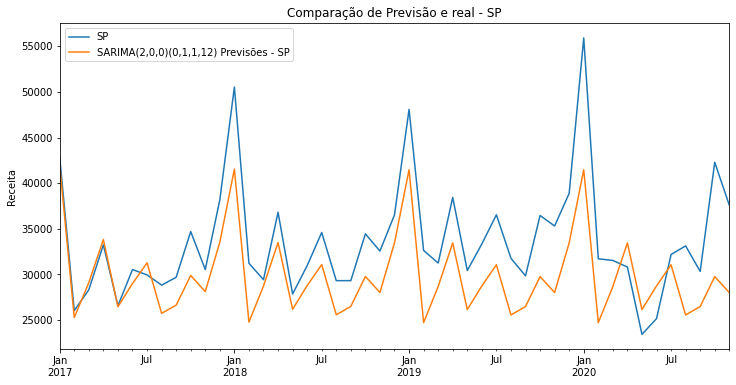

In [70]:
# Plotar previsões em relação aos valores conhecidos
title = 'Comparação de Previsão e real - SP'
ylabel='Receita'
xlabel=''

model_sarima_SP = SARIMAX(train['SP'],order=(2,0,0),seasonal_order=(0,1,1,12))
results_sarima_SP = model_sarima_SP.fit()

# Obtendo a previsão
inicio = len(train)
fim = len(train)+len(test)-1
predictions_sarima_SP = results_sarima_SP.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('SARIMA(2,0,0)(0,1,1,12) Previsões - SP')

ax = test['SP'].plot(legend=True,figsize=(12,6),title=title)
predictions_sarima_SP.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Comparando Dados: **RIO DE JANEIRO**

In [71]:
auto_arima(df['RJ'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  203
Model:             SARIMAX(5, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1760.599
Date:                              Wed, 27 Jan 2021   AIC                           3537.198
Time:                                      00:50:18   BIC                           3563.664
Sample:                                           0   HQIC                          3547.906
                                              - 203                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4060      0.064     -6.302      0.000      -0.532      -0.280
ar.L2         -0.4395      0.073     -6.028      0.000      -0.582      -0.297
ar.L3         -0.2792      0.077     -3.603      0.000      -0.431      -0.127
ar.L4         -0.2147      0.079     -2.724      0.006      -0.369      -0.060
ar.L5         -0.2138      0.069     -3.121      0.002      -0.348      -0.080
ar.S.L12       0.9199      0.050     18.246      0.000       0.821       1.019
ma.S.L12      -0.5469      0.100     -5.483      0.000      -0.742      -0.351
sigma2      2.053e+06   1.47e+05     13.936      0.000    1.76e+06    2.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                88.52
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               4.80   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
auto_arima(df['RJ'], start_p=1, start_q=1,
                          max_p=4, max_q=4, m=12,
                          seasonal=True,
                          d=1,D=1, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3409.351, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3355.348, Time=0.41 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=3356.373, Time=1.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3369.118, Time=0.14 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=3356.575, Time=0.67 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.12 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3361.071, Time=0.39 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=3358.029, Time=1.89 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=3359.099, Time=3.58 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3383.440, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3330.660, Time=0.72 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3331.958, Time=1.85 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3349.638, Time=0.59 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3332.251, Time=0.95 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3332.507, Time=5.33 sec


ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

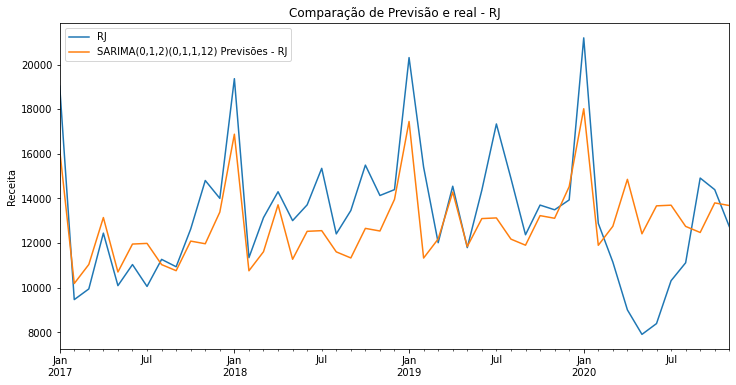

In [73]:
# Plotar previsões em relação aos valores conhecidos
title = 'Comparação de Previsão e real - RJ'
ylabel='Receita'
xlabel=''

model_sarima_RJ = SARIMAX(train['RJ'],order=(0,1,2),seasonal_order=(0,1,1,12))
results_sarima_RJ = model_sarima_RJ.fit()

# Obtendo a previsão
inicio = len(train)
fim = len(train)+len(test)-1
predictions_sarima_RJ = results_sarima_RJ.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('SARIMA(0,1,2)(0,1,1,12) Previsões - RJ')

ax = test['RJ'].plot(legend=True,figsize=(12,6),title=title)
predictions_sarima_RJ.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Comparando Dados: **DISTRITO FEDERAL**

In [74]:
auto_arima(df['DF'], start_p=1, start_q=1,
                          max_p=4, max_q=4, m=12,
                          seasonal=True,
                          d=1,D=1, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True, 
                          stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3886.998, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=1.39 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3834.123, Time=0.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=4.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3816.879, Time=0.40 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.03 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=3806.781, Time=0.84 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=3.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.67 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=6.51 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=inf, Ti

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

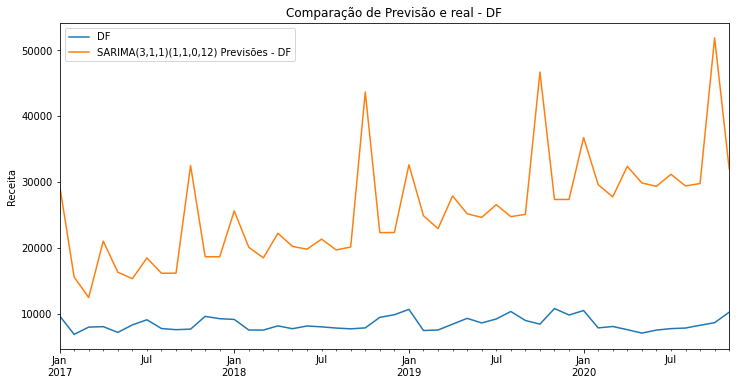

In [75]:
# Plotar previsões em relação aos valores conhecidos
title = 'Comparação de Previsão e real - DF'
ylabel='Receita'
xlabel=''

model_sarima_DF = SARIMAX(train['DF'],order=(3,1,1),seasonal_order=(1,1,1,12))
results_sarima_DF = model_sarima_DF.fit()

# Obtendo a previsão
inicio = len(train)
fim = len(train)+len(test)-1
predictions_sarima_DF = results_sarima_DF.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('SARIMA(3,1,1)(1,1,0,12) Previsões - DF')

ax = test['DF'].plot(legend=True,figsize=(12,6),title=title)
predictions_sarima_DF.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Comparando Dados: **MINAS GERAIS**

In [76]:
auto_arima(df['MG'], start_p=1, start_q=1,
                          max_p=4, max_q=4, m=12,
                          seasonal=True,
                          d=1,D=1, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2825.226, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2815.724, Time=0.35 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=2816.528, Time=0.92 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2814.817, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=2816.773, Time=0.45 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.98 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2816.854, Time=0.20 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=2818.654, Time=2.34 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=2820.500, Time=2.94 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2801.798, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2792.612, Time=0.24 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2793.989, Time=0.60 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2792.315, Time=0.29 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2794.121, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.22 sec
 ARIM

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

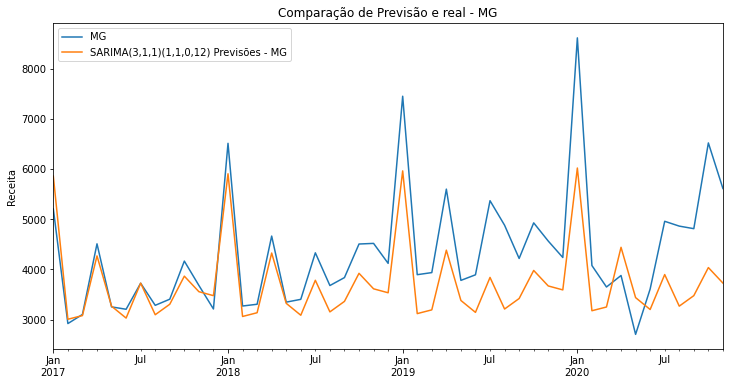

In [77]:
# Plotar previsões em relação aos valores conhecidos
title = 'Comparação de Previsão e real - MG'
ylabel='Receita'
xlabel=''

model_sarima_MG = SARIMAX(train['MG'],order=(1,1,1),seasonal_order=(0,1,2,12))
results_sarima_MG = model_sarima_MG.fit()

# Obtendo a previsão
inicio = len(train)
fim = len(train)+len(test)-1
predictions_sarima_MG = results_sarima_MG.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('SARIMA(3,1,1)(1,1,0,12) Previsões - MG')

ax = test['MG'].plot(legend=True,figsize=(12,6),title=title)
predictions_sarima_MG.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# Prevendo o futuro com SARIMA

In [78]:
modelo_final_sarima = SARIMAX(df['total'],order=(1,1,1),seasonal_order=(1,0,1,12))
resultado_final_sarima = modelo_final_sarima.fit()
previsao_final_sarima = resultado_final_sarima.predict(len(df),len(df)+36,typ='levels').rename('SARIMA(1,1,1)(1,0,1,12) Previsão TOTAL')

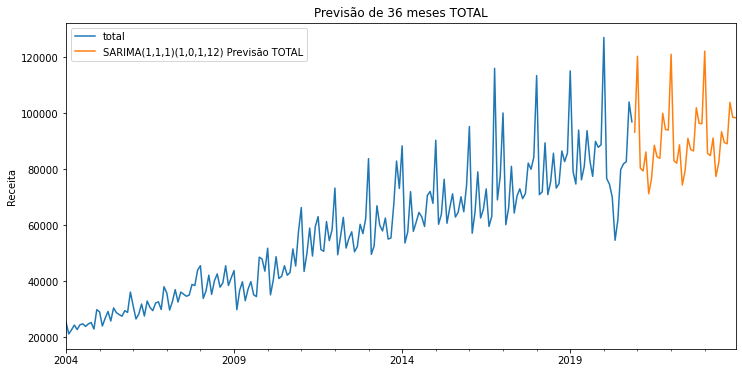

In [79]:
# Plotar previsões de 36 meses para frente
title = 'Previsão de 36 meses TOTAL'
ylabel='Receita'
xlabel=''

ax = df['total'].plot(legend=True,figsize=(12,6),title=title)
previsao_final_sarima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Prevendo futuro com SARIMA: SÃO PAULO

In [80]:
auto_arima(df['SP'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  203
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -1753.527
Date:                              Wed, 27 Jan 2021   AIC                           3517.054
Time:                                      00:59:05   BIC                           3533.316
Sample:                                           0   HQIC                          3523.641
                                              - 203                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    790.5877    151.586      5.215      0.000     493.484    1087.691
ar.L1          0.3770      0.071      5.292      0.000       0.237       0.517
ar.L2          0.1650      0.077      2.137      0.033       0.014       0.316
ma.S.L12      -0.3937      0.066     -5.933      0.000      -0.524      -0.264
sigma2      5.877e+06   3.56e+05     16.519      0.000    5.18e+06    6.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               275.38
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                             0.75
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

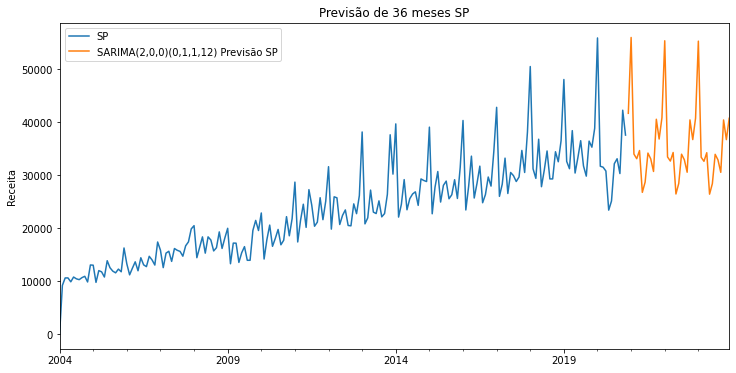

In [81]:
modelo_final_sarima_SP = SARIMAX(df['SP'],order=(2,0,0),seasonal_order=(0,1,1,12))
resultado_final_sarima_SP = modelo_final_sarima_SP.fit()
previsao_final_sarima_SP = resultado_final_sarima_SP.predict(len(df),len(df)+36,typ='levels').rename('SARIMA(2,0,0)(0,1,1,12) Previsão SP')

# Plotar previsões de 36 meses para frente
title = 'Previsão de 36 meses SP'
ylabel='Receita'
xlabel=''

ax = df['SP'].plot(legend=True,figsize=(12,6),title=title)
previsao_final_sarima_SP.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Prevendo futuro com SARIMA: RIO DE JANEIRO

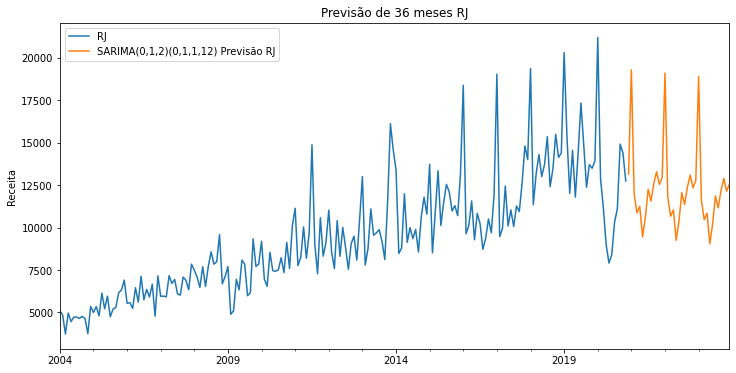

In [82]:
modelo_final_sarima_RJ = SARIMAX(df['RJ'],order=(0,1,2),seasonal_order=(0,1,1,12))
resultado_final_sarima_RJ = modelo_final_sarima_RJ.fit()
previsao_final_sarima_RJ = resultado_final_sarima_RJ.predict(len(df),len(df)+36,typ='levels').rename('SARIMA(0,1,2)(0,1,1,12) Previsão RJ')

# Plotar previsões de 36 meses para frente
title = 'Previsão de 36 meses RJ'
ylabel='Receita'
xlabel=''

ax = df['RJ'].plot(legend=True,figsize=(12,6),title=title)
previsao_final_sarima_RJ.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Prevendo futuro com SARIMA: DISTRITO FEDERAL

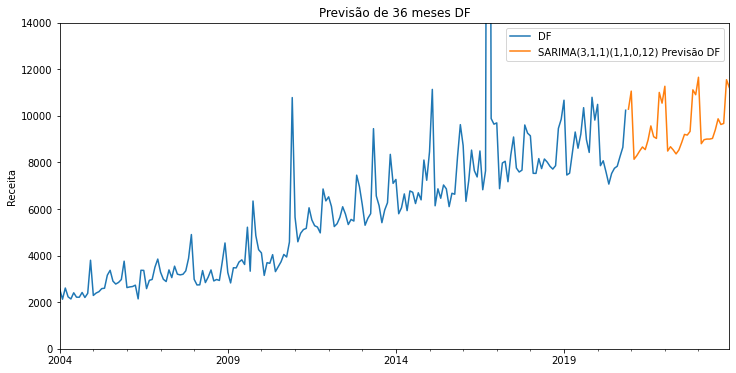

In [83]:
modelo_final_sarima_DF = SARIMAX(df['DF'],order=(3,1,1),seasonal_order=(1,1,0,12))
resultado_final_sarima_DF = modelo_final_sarima_DF.fit()
previsao_final_sarima_DF = resultado_final_sarima_DF.predict(len(df),len(df)+36,typ='levels').rename('SARIMA(3,1,1)(1,1,0,12) Previsão DF')

# Plotar previsões de 36 meses para frente
title = 'Previsão de 36 meses DF'
ylabel='Receita'
xlabel=''

ax = df['DF'].plot(legend=True,figsize=(12,6),title=title, ylim=(0,14000))
previsao_final_sarima_DF.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Prevendo futuro com SARIMA: MINAS GERAIS

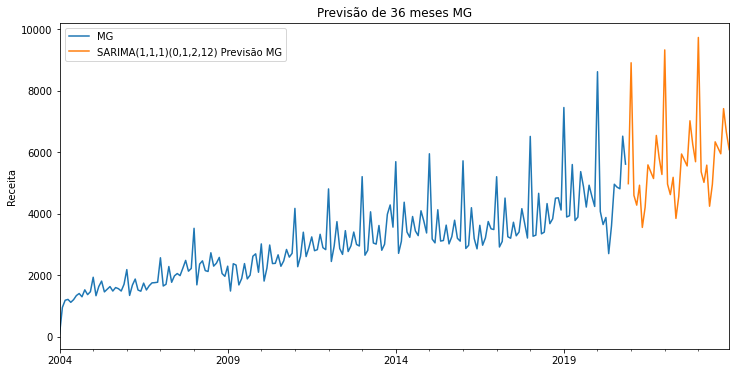

In [84]:
modelo_final_sarima_MG = SARIMAX(df['MG'],order=(1,1,1),seasonal_order=(0,1,2,12))
resultado_final_sarima_MG = modelo_final_sarima_MG.fit()
previsao_final_sarima_MG = resultado_final_sarima_MG.predict(len(df),len(df)+36,typ='levels').rename('SARIMA(1,1,1)(0,1,2,12) Previsão MG')

# Plotar previsões de 36 meses para frente
title = 'Previsão de 36 meses MG'
ylabel='Receita'
xlabel=''

ax = df['MG'].plot(legend=True,figsize=(12,6),title=title)
previsao_final_sarima_MG.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);